損失関数の表示

In [2]:
import pandas as pd
import matplotlib.pyplot as plt         
import os        
import re
import sys

In [3]:
#log_pathからpltに用いるdfを作成

def make_df_from_log_path(log_path):
    search_string = "value_loss:"
    output_lines = []

    with open(log_path, 'r') as file:
        lines = file.readlines()

        for i, line in enumerate(lines):
            if search_string in line:
                # print(line)
                # print(lines[i])
                # break
                # output_lines.extend(lines[i:i+1])
                temp_str = lines[i] + " " + lines[i+1] +  " " + lines[i+2] +  " " + lines[i-1] +  " " + lines[i-2] #i-nは[Evaluate]からn行上
                output_lines.append(temp_str)

    data = output_lines
    # print(output_lines[0])

    # 各行をスペースで分割し、キーと値のペアに分ける
    parsed_data = [line.strip().split('\n') for line in data]
    print(parsed_data[0])
    # sys.exit()

    # 各行のデータを辞書に格納し、DataFrameを作成する
    result = []
    for line in parsed_data:
        row_data = {}
        i=1
        for item in line:
            try:
                # if(i>1):
                key_value = item.split(':')
                data_value = key_value[1].split(',')
                # print(key_value[0])
                m =re.search(r"\d+\.\d+|\-\d+\.\d", data_value[0])
                # print(m.group(0), type(m.group(0)))
                # print(float(m.group(0)), type(float(m.group(0))))
                # break
                row_data[key_value[0]] = float(m.group(0))
                
                # if(i==1):
                #     print(item)
                #     key_value = item.split('_')
                #     # print(key_value[1])
                #     try:
                #         row_data[key_value[0]] = int(key_value[1][:7])
                #         # print(key_value[1])
                #     except:
                #         row_data[key_value[0]] = int(key_value[1][:-1])
                #         # print(row_data[key_value[0]])
                    
            except:
                print(item)
                pass
                
            i+=1
        result.append(row_data)
        
    # print(result)

    # DataFrameを作成する
    df = pd.DataFrame(result)
    # print(df)
    return df



In [ ]:
# log_path_11 = "/home/ubuntu/kc_profit_naacl/nodhup_outputs/withoneSEC_tf_1_2.log"
# df_11 = make_df_from_log_path(log_path_11)

log_path_12 = "../nodhup_outputs/withoneSEC_tf_2_random.log"
df_12 = make_df_from_log_path(log_path_12)


log_path_13 = "../nodhup_outputs/tweetonly_3.log"
df_13 = make_df_from_log_path(log_path_13)

In [6]:
print(df_13[:100])

    value_loss   policy_loss   policy_loss_mean   target_q_batch  \
0       0.0054       88.3233            88.3233          20.1325   
1    7313.2690        9.9973             9.9973          15.3080   
2     898.7617           NaN                NaN          18.1880   
3    1113.1177      -67.5000           -67.5000          13.9752   
4    2881.0503      -65.9000           -65.9000          15.7594   
..         ...           ...                ...              ...   
95      9.0537       -0.3000            -0.3000           0.3476   
96      0.0121       -0.3000            -0.3000           0.4158   
97      0.0125       -0.3000            -0.3000           0.1827   
98      0.0103       -0.3000            -0.3000           0.3856   
99      0.0007       -0.3000            -0.3000           0.3065   

     reward_batch  
0       -0.000000  
1        0.102310  
2       -0.000000  
3       -0.000000  
4        0.053320  
..            ...  
95       0.000976  
96       0.084145  
97 

<Axes: >

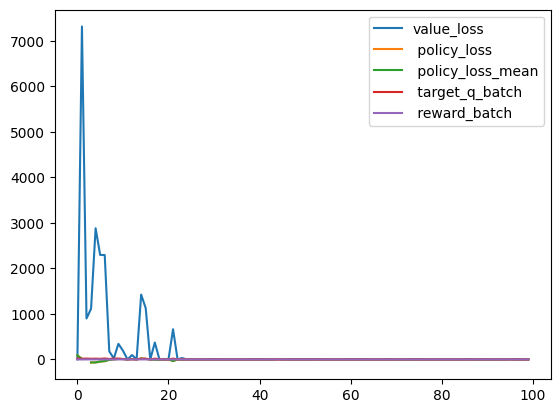

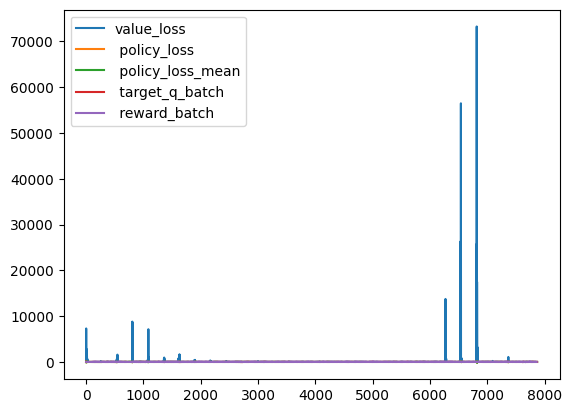

In [6]:
df_13[:100].plot()
df_13.plot()

In [58]:

dfs = [df_11]
log_files = [os.path.basename(log_path_11)]

In [8]:

df = df_9
filtered_df = df[(df['Step'] >= 1000) & (df['Step'] <= 3000)]
# print(filtered_df[["Step", "total_reward"]])
print(df.columns)

Index(['Step', 'mean_reward', 'mean_sharpe', 'mean_sortino', 'mean_calmar',
       'mean_mdd', 'mean_cum_returns', 'previous_total_asset', 'total_reward',
       '[1', '[2', '3.75s/it]total_reward', '[3', '[4',
       '3.76s/it]total_reward', '[5', '3.80s/it]total_reward', '[7', '[9',
       '[11', '[12', '[13', '[17', '[18', '[19', '[20'],
      dtype='object')


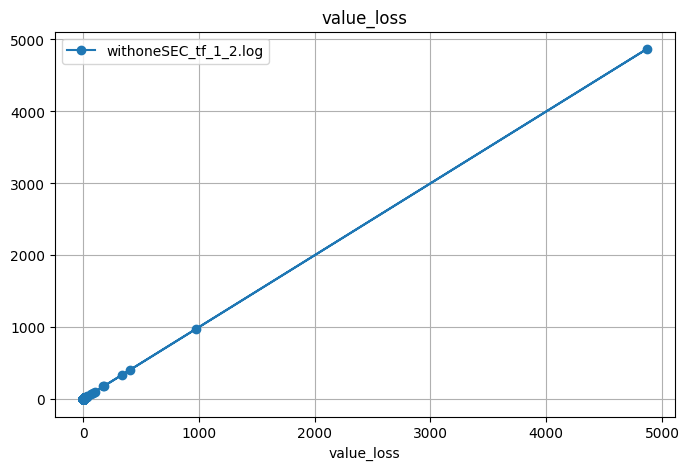

In [60]:
indicators = ["value_loss"]

for indicator in indicators:
# x軸にはdfの一列目のデータを、y軸には2列目以降のデータをプロットします
    plt.figure(figsize=(8, 5))  # グラフのサイズを設定します
    for df, log_file in zip(dfs, log_files):
        # df = df[(df['Step'] >= 0) & (df['Step'] <= 3000)] #期間調整
        for column in df[[indicator]]:  # ここで何をプロットするか設定  total_reward mean_sharpe　mean_mdd
            # plt.plot(df[df.columns[0]], (df[column]+100000)/100000, marker='o', label=log_file) #tortal reward
            plt.plot(df[df.columns[0]], df[column], marker='o', label=log_file)

    # df = df_2
    # df = df[:21]
    # for column in df.columns[1:2]:  # ここで何列目をプロットするか設定
    #     plt.plot(df[df.columns[0]], df[column], marker='o', label=column)

    plt.xlabel(dfs[0].columns[0])  # x軸のラベルを設定します
    # plt.ylabel("Values")  # y軸のラベルを設定します
    title = column
    # title = "profit_ratio"
    plt.title(title)  # グラフのタイトルを設定します
    plt.legend()  # 凡例を追加します
    plt.grid(True)  # グリッドを表示します（オプション）

    # save_png_name = title + "_" + log_files[0] + "_" + log_files[1] + ".png"
    # save_folder = "/home/fukuda/profit-naacl/profit-naacl_2/pngs"
    # save_path = os.path.join(save_folder, save_png_name)
    # print(save_path)
    # plt.savefig(save_path)

    plt.show()  # グラフを表示します